In [2]:
import numpy as np
import pandas as pd
from scipy import io
import os
import cv2
import matplotlib.pyplot as plt

In [103]:
mnist = io.loadmat('mnist-original.mat')
X, y = mnist['data'], mnist['label']
X = np.array(X).T
y = np.array(y).T.ravel()

(96, 48)


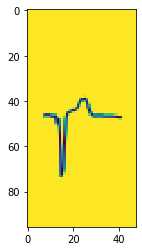

In [8]:
# z = np.array(X[0])

# z= np.vstack((z, X[1]))
# z.shape
# print(z)

im = cv2.imread("../patient data 2020.3.27/11423425 - RVOT anteroseptal_ PVC LBBB/08-JUL-2009-09.09.45 PVC LBBB/pvc lbbb1.png", cv2.IMREAD_GRAYSCALE)
im = cv2.resize(im, dsize=(48, 96),interpolation=cv2.INTER_LINEAR)
print(im.shape)

im = im.flatten()



plt.imshow(im.reshape(96, 48)) 
plt.show()

# z = np.array('lbbb')

# z= np.vstack((z, 'nor'))
# z.shape
# print(z.flatten())
# print(y.shape)
# print(y[0:10])


In [4]:
DIrs = ['../patient data 2020.3.27', '../patient data 2']
targets = ['nor', 'pvc lbbb', 'pvc rbbb', 'vt lbbb', 'vt rbbb', 'sinus rbbb']
# lead = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5', 'V6']
# lead = ['II', 'V5', 'V1']
lead = ['V1']
import re


flag=0
counter = [0, 0, 0, 0, 0, 0, 6]

# def makeLabel(target):
#     if target=='nor':
#         counter[0] += 1
#         return ['sinus', 'nor']
#     if target=='sinus rbbb':
#         counter[1] += 1
#         return ['sinus', 'rbbb']
#     if target=='sinus lbbb':
#         counter[2] += 1
#         return ['sinus', 'lbbb']
#     if target=='pvc lbbb':
#         counter[3] += 1
#         return ['pvc', 'lbbb']
#     if target=='pvc rbbb':
#         counter[4] += 1
#         return ['pvc', 'rbbb']
#     if target=='vt lbbb':
#         counter[5] += 1
#         return ['vt', 'lbbb']
#     if target=='vt rbbb':
#         counter[6] += 1
#         return ['vt', 'rbbb']
def makeLabel(target):
    if target=='nor':
        counter[0] += 1
        return 'nor'
    if target=='sinus rbbb':
        counter[1] += 1
        return 'rbbb'
    if target=='sinus lbbb':
        counter[2] += 1
        return 'lbbb'
    if target=='pvc lbbb':
        counter[3] += 1
        return 'lbbb'
    if target=='pvc rbbb':
        counter[4] += 1
        return 'rbbb'
    if target=='vt lbbb':
        counter[5] += 1
        return 'lbbb'
    if target=='vt rbbb':
        counter[6] += 1
        return 'rbbb'
    
for targetLead in lead:
    X = np.array([])
    y = np.array([])
    for Dir in DIrs:
        workDIr = os.path.abspath(Dir)
        print(workDIr)
        for (path, dir, files) in os.walk(workDIr):
            if path.split('/')[-1] != targetLead:
                continue
            for i, file in enumerate(files):
                if 'Rpeak' in file:
                    del files[i]

    #         for dirname in dirnames:
    #             print("\t", dirname)
            files = sorted(files, key=lambda x: int(re.sub('\D', '', x)))
#             print(files)
            for filename in files:
                ext = os.path.splitext(filename)[-1]
                if ext== '.png':
                    for target in targets:
                        if target in filename:
                            if target=='nor' and flag%5!=0:
                                flag+=1
                                continue
                            elif target=='nor' and flag%5==0:
                                flag+=1
                            im = cv2.imread(path + '/' + filename, cv2.IMREAD_GRAYSCALE)
                            im = cv2.resize(im, dsize=(48, 96),interpolation=cv2.INTER_LINEAR).flatten()
                            if len(X) == 0:
                                X = np.array(im)
                                y = np.array(makeLabel(target))
                            else:
                                X = np.vstack((X, im))
                                y = np.vstack((y, makeLabel(target)))
                            break
                            
    
    
    io.savemat('testImg_half_shape_'+ targetLead +'.mat', {'data': X, 'label': y})

/tf/notebooks/patient data 2020.3.27
/tf/notebooks/patient data 2


array([['lbbb'],
       ['nor'],
       ['nor'],
       ...,
       ['rbbb'],
       ['rbbb'],
       ['nor']], dtype='<U4')

In [6]:
print(X.shape)
print(y)
print(X[0])

(2254, 4608)
[['sinus' 'nor']
 ['sinus' 'nor']
 ['sinus' 'nor']
 ...
 ['sinus' 'nor']
 ['pvc' 'rbbb']
 ['pvc' 'rbbb']]
[255 255 255 ... 255 255 255]


In [12]:
types = {'nor': 0, 'rbbb': 1, 'lbbb': 2}

tmp = []
for i in y:
    tmp.append(types[i])
y = np.array(tmp)

In [13]:
cnt = {'nor': 0, 'rbbb': 0, 'lbbb': 0}
for i in y:
    

array([0, 0, 0, ..., 0, 1, 1])

In [150]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

In [175]:
X_train = X_train.reshape(2943, 192, 96, 1)
X_test = X_test.reshape(328, 192, 96,1)


(2943,)

In [179]:
X

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [177]:
input_tensor = Input(shape=(192, 96, 1), dtype='uint8', name='input')
 
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(input_tensor)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01))(x)
x = layers.MaxPooling2D((2,2))(x)
 
x = layers.Flatten()(x)
x = layers.Dense(4096, kernel_initializer='he_normal')(x)
x = layers.Dense(4096, kernel_initializer='he_normal')(x)
output_tensor = layers.Dense(3, activation='softmax')(x)
 
myvgg = Model(input_tensor, output_tensor)
myvgg.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 192, 96, 1)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 192, 96, 64)       640       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 192, 96, 64)       36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 96, 48, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 96, 48, 128)       73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 96, 48, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 24, 128)       0   

In [ ]:
checkpoint = ModelCheckpoint(filepath='My_ECG.hdf5', 
            monitor='loss', 
            mode='min', 
            save_best_only=True)
 
myvgg.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])
 
myvgg.fit(X_train, y_train, epochs=100, verbose=2, validation_split=0.1)

model.load_weights(file_path)

pred_test = model.predict(x_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(y_test, pred_test)

print("Test accuracy score : %s "% acc)


# history = myvgg.fit_generator(X_train, y_train, 
#             steps_per_epoch=25, 
#             epochs=300, 
#             validation_data=val_generator, 
#             validation_steps=16, 
#             callbacks=[checkpoint])
 
 
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
 


Train on 2648 samples, validate on 295 samples
Epoch 1/100


In [ ]:
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()